In [1]:
# Dependencies

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

In [2]:
pokedex = pd.read_csv('Pokemon.csv')
pokedex

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
# Classification of Legendary Status
y = pokedex["Legendary"]
y.value_counts()

False    735
True      65
Name: Legendary, dtype: int64

In [4]:
X = pokedex.drop("Legendary", axis=1)
X = X.drop("#", axis=1)
X = X.drop("Name", axis=1)
X = X.drop("Type 1", axis=1)
X = X.drop("Type 2", axis=1)
X = X.drop("Generation", axis=1)
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 0.998/0.940
k: 3, Train/Test Score: 0.975/0.945
k: 5, Train/Test Score: 0.967/0.950
k: 7, Train/Test Score: 0.953/0.950
k: 9, Train/Test Score: 0.955/0.930
k: 11, Train/Test Score: 0.953/0.930
k: 13, Train/Test Score: 0.955/0.925
k: 15, Train/Test Score: 0.953/0.935
k: 17, Train/Test Score: 0.952/0.935
k: 19, Train/Test Score: 0.947/0.940


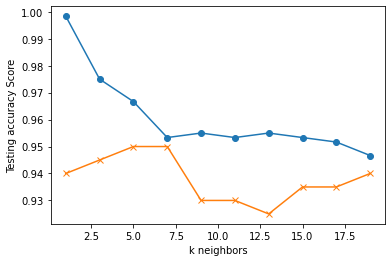

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Note that k: 15 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled, y_train)
print('k=15 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=15 Test Acc: 0.935


In [10]:
predicted_class = knn.predict(X_scaler.transform(X))
# print(predicted_class)

In [11]:
# Classification of Primary Type
y2 = pokedex["Type 1"]
y2.value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=47)

X_scaler2 = StandardScaler().fit(X_train)

X_train_scaled = X_scaler2.transform(X_train)
X_test_scaled = X_scaler2.transform(X_test)

k: 1, Train/Test Score: 0.990/0.180
k: 3, Train/Test Score: 0.485/0.155
k: 5, Train/Test Score: 0.418/0.190
k: 7, Train/Test Score: 0.417/0.210
k: 9, Train/Test Score: 0.383/0.195
k: 11, Train/Test Score: 0.360/0.205
k: 13, Train/Test Score: 0.372/0.215
k: 15, Train/Test Score: 0.348/0.235
k: 17, Train/Test Score: 0.342/0.240
k: 19, Train/Test Score: 0.322/0.235


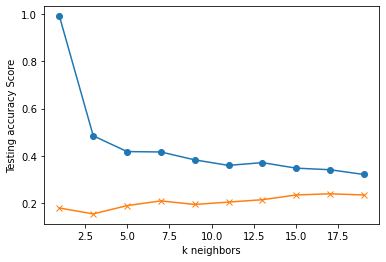

In [29]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [30]:
# Note that k: 17 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train_scaled, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=17 Test Acc: 0.240


In [31]:
predicted_class = knn.predict(X_scaler2.transform(X))
# print(predicted_class)

predictions = pokedex[['Name',"Type 1"]]
predictions['Predicted Type'] = predicted_class
predictions.head()

<ipython-input-31-53e135d534af>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Predicted Type'] = predicted_class


,Name,Type 1,Predicted Type
0,Bulbasaur,Grass,Water
1,Ivysaur,Grass,Grass
2,Venusaur,Grass,Water
3,VenusaurMega Venusaur,Grass,Psychic
4,Charmander,Fire,Fire


In [32]:
accuracy = []
for index, row in predictions.iterrows():
    if predictions.loc[index,'Type 1'] == predictions.loc[index,'Predicted Type']:
        accuracy.append(1)
    else:
        accuracy.append(0)
predictions['Accurate'] = accuracy
predictions.head()

<ipython-input-32-4e4376b56e8c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictions['Accurate'] = accuracy


,Name,Type 1,Predicted Type,Accurate
0,Bulbasaur,Grass,Water,0
1,Ivysaur,Grass,Grass,1
2,Venusaur,Grass,Water,0
3,VenusaurMega Venusaur,Grass,Psychic,0
4,Charmander,Fire,Fire,1


In [33]:
grouping = predictions.groupby('Type 1')
grouping.mean()

,Accurate
Type 1,
Bug,0.550725
Dark,0.032258
Dragon,0.437500
Electric,0.454545
Fairy,0.058824
Fighting,0.074074
Fire,0.480769
Flying,0.000000
Ghost,0.218750


In [39]:
grouping.mean().to_csv('KNN_Type_Results.csv')

In [49]:
scores = []
for i in range(0,50):
    X_train, X_test, y_train, y_test = train_test_split(X, y2, random_state=i)
    X_scaler = StandardScaler().fit(X_train)
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=17)
    knn.fit(X_train_scaled, y_train)
    score = knn.score(X_test_scaled, y_test)
    scores.append(score)
    print('k=17 Test Acc: %.3f' % score)
average = sum(scores)/len(scores)
print(average)

k=17 Test Acc: 0.260
k=17 Test Acc: 0.180
k=17 Test Acc: 0.230
k=17 Test Acc: 0.210
k=17 Test Acc: 0.210
k=17 Test Acc: 0.185
k=17 Test Acc: 0.235
k=17 Test Acc: 0.225
k=17 Test Acc: 0.225
k=17 Test Acc: 0.270
k=17 Test Acc: 0.200
k=17 Test Acc: 0.250
k=17 Test Acc: 0.230
k=17 Test Acc: 0.240
k=17 Test Acc: 0.200
k=17 Test Acc: 0.255
k=17 Test Acc: 0.255
k=17 Test Acc: 0.210
k=17 Test Acc: 0.220
k=17 Test Acc: 0.205
k=17 Test Acc: 0.215
k=17 Test Acc: 0.215
k=17 Test Acc: 0.230
k=17 Test Acc: 0.220
k=17 Test Acc: 0.215
k=17 Test Acc: 0.155
k=17 Test Acc: 0.255
k=17 Test Acc: 0.180
k=17 Test Acc: 0.210
k=17 Test Acc: 0.235
k=17 Test Acc: 0.225
k=17 Test Acc: 0.190
k=17 Test Acc: 0.210
k=17 Test Acc: 0.220
k=17 Test Acc: 0.260
k=17 Test Acc: 0.225
k=17 Test Acc: 0.215
k=17 Test Acc: 0.210
k=17 Test Acc: 0.255
k=17 Test Acc: 0.225
k=17 Test Acc: 0.255
k=17 Test Acc: 0.245
k=17 Test Acc: 0.235
k=17 Test Acc: 0.195
k=17 Test Acc: 0.190
k=17 Test Acc: 0.200
k=17 Test Acc: 0.200
k=17 Test Acc